In [1]:
!pip install control

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
from control import (TransferFunction, step_response, bode_plot,
                     feedback, sisotool)

plt.rcParams['figure.figsize'] = (10,10) # tamanho do gráfico
plt.rcParams['font.size'] = 16 # tamanho da letra

Malha Fechada = 
 
          70
-----------------------
s^3 + 7 s^2 + 10 s + 70



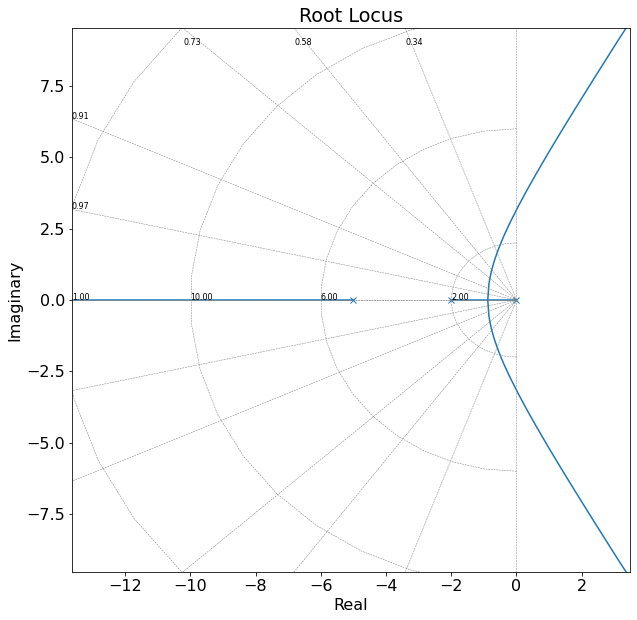

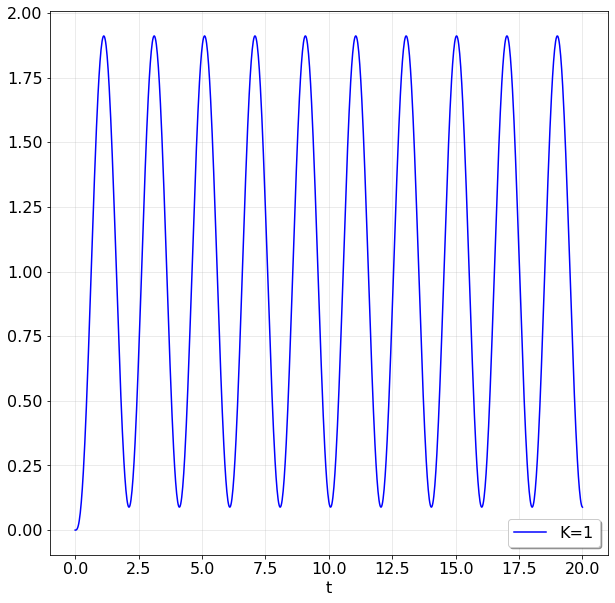

In [6]:
# Procedimento para encontrar ganho crítico e período crítico

# Função transferência do sistema a ser controlado (slide 9 - aula 15 - semana 6)
H = TransferFunction([1], np.convolve([1,2,0],[1,5])) # convolve faz a multiplicação entre polinômios

# Lugar da Raízes
plt.figure(1)
out = ctl.rlocus(H, kvect=None, xlim=None, ylim=None, plotstr=None, plot=True, print_gain=None, grid=None)

Kc = 70 # por ganho crítico por Critério de Rough

# resposta ao degrau para encontra período crítico
MF = feedback(Kc*H, 1) # malha fechada com ganho crítico
print('Malha Fechada = \n', MF)

t = np.linspace(0, 20, 1001)

plt.figure(2)
tout, yout1 = step_response(MF, t, X0=0)
plt.plot(tout, yout1, 'b', linewidth=1.5, label='K=1')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

Ganha crítico =  70
Período crítico =  2
Cpid =
 
10.5 s^2 + 42 s + 42
--------------------
         s



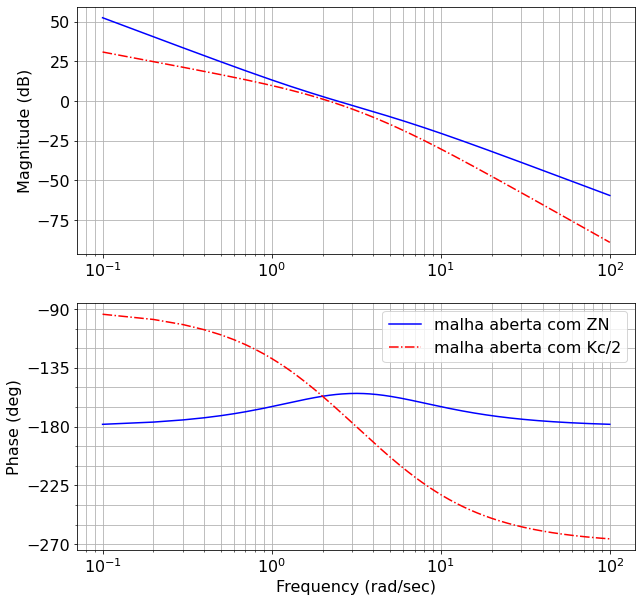

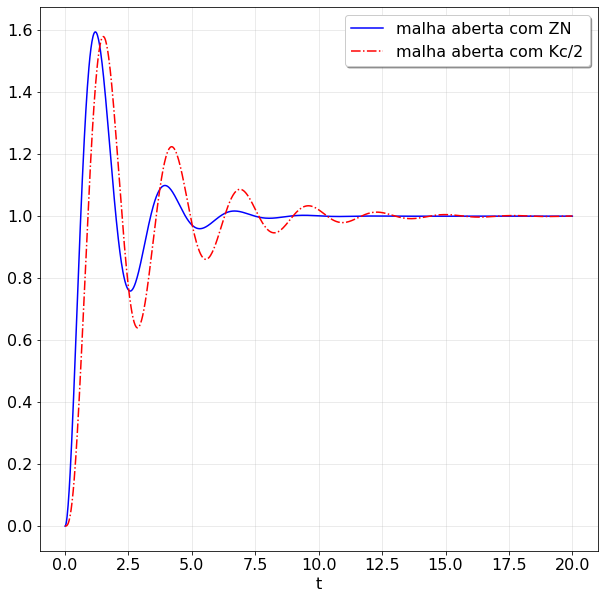

In [7]:

# Kc = 70 
print('Ganha crítico = ', Kc )
Tc = 2 # período crítico analisando resposta ao degrau
print('Período crítico = ', Tc )

# PID por Zielgler Nichols para sistemas que apresentam oscilação
Cpid = TransferFunction(0.075*Kc*Tc*np.convolve([1,4/Tc],[1,4/Tc]),[1,0]);

print('Cpid =\n',Cpid)

# Comparação entre o sistema controlado com o PID e com um granho proporcional

L = Cpid*H # malha aberta com ZN
Lp = (Kc/2)*H # malha aberta com Kc/2

w = np.linspace(0.1, 100, 1001)

plt.figure(3)  # Diagrama de Bode da Malha aberta
# reparar que o PID tem mais ação integral que o ganho proporcional
mag, phase, omega = bode_plot(L, omega=w, dB=True, linestyle='solid', color='blue') 
mag, phase, omega = bode_plot(Lp, omega=w, dB=True, linestyle='dashdot', color='red') 
plt.legend(["malha aberta com ZN", "malha aberta com Kc/2"])
plt.show

t = np.linspace(0, 20, 1001)

sys1 = feedback(1*L, 1) # malha fechada com ZN
sys2 = feedback(1*Lp, 1) # malha fechada com Kc/2

plt.figure(4) # Resposta ao Degrau da Malha Fechada
tout, yout1 = step_response(sys1, t, X0=0)
tout, yout2 = step_response(sys2, t, X0=0)
plt.plot(tout, yout1, 'b', linewidth=1.5, label='malha aberta com ZN')
plt.plot(tout, yout2, 'r-.', linewidth=1.5, label='malha aberta com Kc/2')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

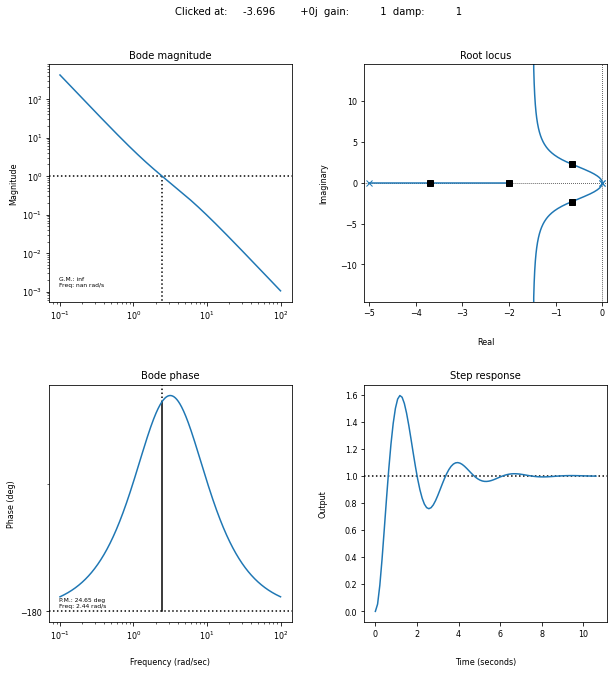

In [8]:
# https://python-control.readthedocs.io/en/latest/generated/control.sisotool.html
# ferramenta que mostra: Diagrama de Bode da Malha Aberta, Lugar das Raízes e Resposta ao Degrau da Malha fechada
# argumento: malha aberta com o controlador ZN
ctl.sisotool(L)

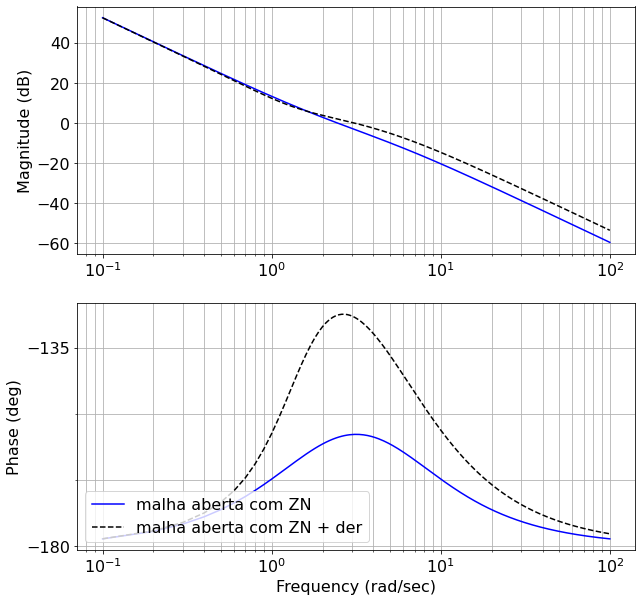

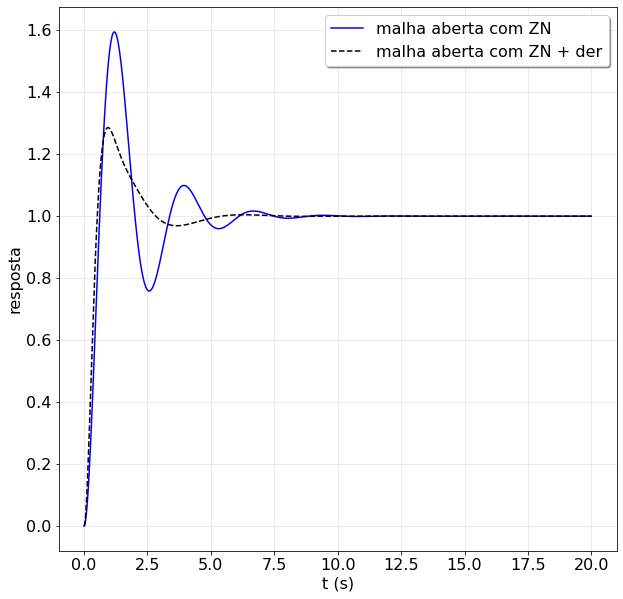

In [9]:
# PID por ajuste, aumentar a ação derivativa
Cpid2 = TransferFunction([2*10.5,42,42],[1,0]);

L2 = Cpid2*H # malha aberta com ZN, aumentando a ação derivativa

w = np.linspace(0.1, 100, 1001)

plt.figure(5)  # Diagrama de Bode da Malha Aberta
# reparar que o aumento da ação derivativa aumentou a margem de fase e reduziu as oscilações
mag, phase, omega = bode_plot(L, omega=w, dB=True, linestyle='solid', color='blue')
mag, phase, omega = bode_plot(L2, omega=w, dB=True, linestyle='dashed', color='black')
plt.legend(["malha aberta com ZN", "malha aberta com ZN + der"])
plt.show

t = np.linspace(0, 20, 1001)

sys2 = feedback(L2, 1) # malha fechada com ZN, aumentando a ação derivativa

plt.figure(6) # Resposta ao Degrau da Malha Fechada
tout, yout1 = step_response(sys1, t, X0=0)
tout, yout2 = step_response(sys2, t, X0=0)
plt.plot(tout, yout1, 'b', linewidth=1.5, label='malha aberta com ZN')
plt.plot(tout, yout2, 'k--', linewidth=1.5, label='malha aberta com ZN + der')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t (s)')
plt.ylabel('resposta')
plt.show()

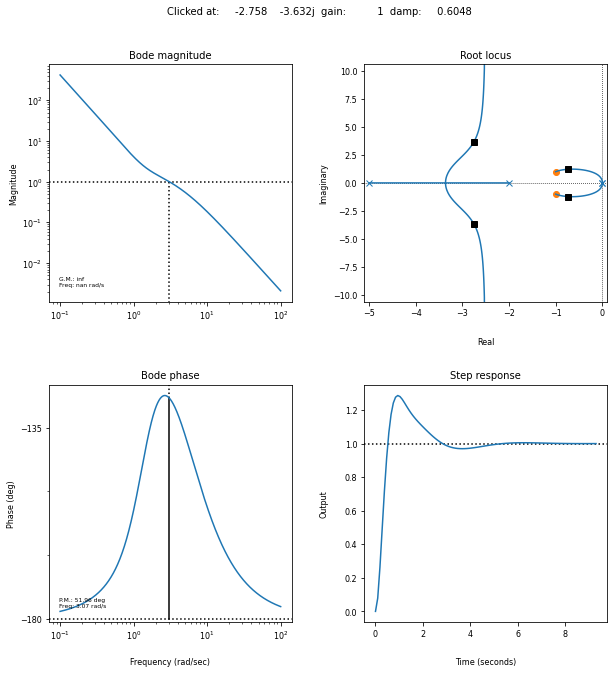

In [10]:
# https://python-control.readthedocs.io/en/latest/generated/control.sisotool.html
# ferramenta que mostra: Diagrama de Bode da Malha Aberta, Lugar das Raízes e Resposta ao Degrau da Malha fechada
# argumento: malha aberta com o controlador ZN com mais derivativo
ctl.sisotool(L2)

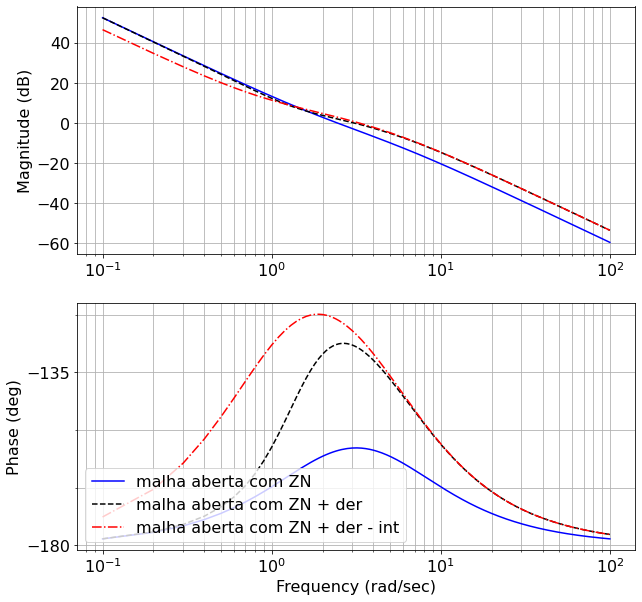

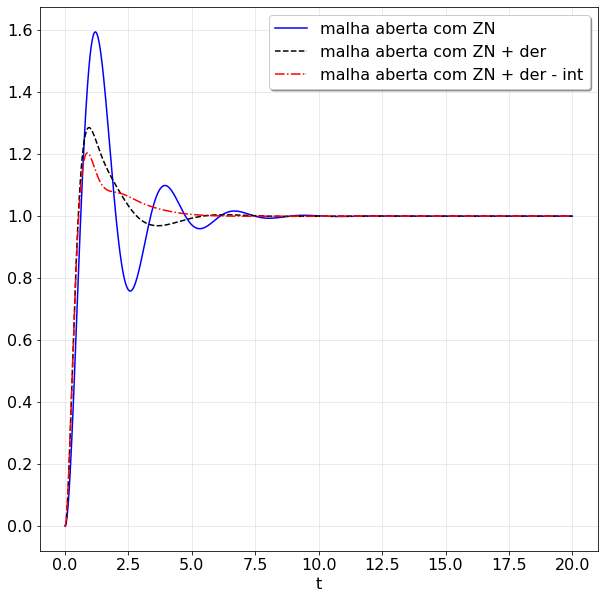

In [11]:
# PID por ajuste, aumento da ação derivativa e redução da ação integrativa
Cpid3 = TransferFunction([2*10.5,42,0.5*42],[1,0]);

L3 = Cpid3*H # malha aberta 

w = np.linspace(0.1, 100, 1001)

plt.figure(7)  # Diagrama de Bode da Malha Aberta
# reparar que o redução da ação integral reduziu a oscilações
mag, phase, omega = bode_plot(L, omega=w, dB=True, linestyle='solid', color='blue')
mag, phase, omega = bode_plot(L2, omega=w, dB=True, linestyle='dashed', color='black')
mag, phase, omega = bode_plot(L3, omega=w, dB=True, linestyle='dashdot', color='red')
plt.legend(["malha aberta com ZN",  "malha aberta com ZN + der", "malha aberta com ZN + der - int"])
plt.show

t = np.linspace(0, 20, 1001)

sys3 = feedback(L3, 1) # Kp = 10

plt.figure(8) # Malha Fechada
tout, yout3 = step_response(sys3, t, X0=0)
plt.plot(tout, yout1, 'b', linewidth=1.5, label='malha aberta com ZN')
plt.plot(tout, yout2, 'k--', linewidth=1.5, label='malha aberta com ZN + der')
plt.plot(tout, yout3, 'r-.', linewidth=1.5, label='malha aberta com ZN + der - int')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

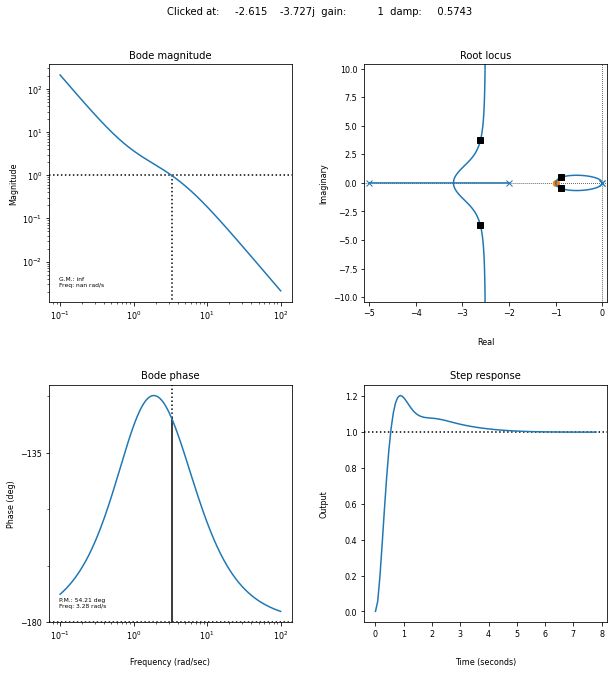

In [12]:
# https://python-control.readthedocs.io/en/latest/generated/control.sisotool.html
# ferramenta que mostra: Diagrama de Bode da Malha Aberta, Lugar das Raízes e Resposta ao Degrau da Malha fechada
# argumento: malha aberta com o controlador ZN com mais derivativo e menos integrativo
ctl.sisotool(L3)